### Student ID: 18195067
### Student Name: Abhijit Sinha

# Etivity1

In [1]:
# Importing Modules and Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import math
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split


## Task 1
Load bank-et1.csv into a Pandas dataframe. Examine the first few data rows and the last few data rows. Identify an attribute that can be the target/dependable variable for 2-class classification. Follow the examples in the provided notebook “Lab 1 - Exploratory Data Analysis. ipynb ” (see section Material, Resources and Online Meetings below).

In [2]:
# Load the csv file to pandas dataframe
df = pd.read_csv('./bank_et1.csv')


In [3]:
# Print first 5 rows of the dataframe
df.head(5)

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,0,32,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,1,39,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,2,59,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,3,47,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,4,54,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [4]:
# Dropping the Unnamed column is redundant
df.drop(columns='Unnamed: 0', inplace=True)

In [5]:
# Print last 5 rows of the dataframe
df.tail(5)

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20,student,single,NaN,no,2785,-2.170524,1.081071,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28,admin.,single,secondary,no,127,0.811788,1.134496,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81,retired,married,primary,no,1154,0.504655,0.042190,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46,services,married,primary,no,4343,-0.965874,0.302708,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40,entrepreneur,married,secondary,no,6403,-0.800893,1.066659,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [6]:
# Find the attributes with 2 classes to identify the 2-class classification

for col_name in df.columns:
    unique_cat = len(df[col_name].unique())
    if unique_cat == 2:
        print("Feature '{col_name}' has {unique_cat} unique categories".format(
            col_name=col_name, unique_cat=unique_cat))

Feature 'default' has 2 unique categories
Feature 'housing' has 2 unique categories
Feature 'loan' has 2 unique categories
Feature 'subscribed' has 2 unique categories


##### After examining the data, we can see that the features: default, housing, loan, contact and subscribed has 2 classes.

In [7]:
# Find the counts for the attributes with 2 classes 

print("Arribute default", df['default'].value_counts().sort_values(ascending=False))
print(df['housing'].value_counts().sort_values(ascending=False))
print(df['loan'].value_counts().sort_values(ascending=False))
print(df['subscribed'].value_counts().sort_values(ascending=False))

Arribute default no     1985
yes      15
Name: default, dtype: int64
no     1037
yes     963
Name: housing, dtype: int64
no     1750
yes     250
Name: loan, dtype: int64
yes    1000
no     1000
Name: subscribed, dtype: int64


### Identify an attribute that can be the target/dependable variable for 2-class classification?
- The attribute `subscribed` seems to be well distributed in the 2 classes
- The unknown in this case is if the user subscribed to the bank plan after being contacted by the bank customer service. 
- The attribute which can be the target/dependable variable for 2-class classification is **subscribed** which has 2 outcomes: `yes` or `no`.

## Task 2
Follow the examples in the provided notebook “Lab 1 - Exploratory Data Analysis. ipynb ” (see section Material, Resources and Online Meetings below) to perform EDA of the bank data set.

- Calculate statistics for the numerical and categorical attributes.
- Use at least two different plotting techniques to plot the distribution of two numerical and two categorical attributes. Draw short conclusions (in a markdown cell).
- Generate two plots with the combined distribution of attributes and draw conclusions from them (in a markdown cell).
- Generate additional plots to identify two numerical attributes that can potentially be used for predicting the value of the dependent variable you chose in Task 1.
    - You won't find two numerical attributes that will perfectly classify a dependent variable. Pick the best you can find.

### Calculate statistics for the numerical and categorical attributes.

In [8]:
# Print statistical summary for all numerical attributes
df.describe()

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.751500,1413.663500,0.241951,0.485030,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.723077,3131.224213,0.821604,1.075543,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,-0.308018,-0.274181,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,0.224099,0.487082,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,0.806315,1.211896,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000


#### Numerical variables preview:
1. **AGE:** The maximum age of the customer contacted was 93 years old and median age is just 38 years.
2. **BALANCE:** Balance is in the range of -980 to 81204. Data is skewed as the median balance is 551 and mean is balance is 1413
3. **DAY:** Customers were contacted in between day 1 to day 31 of various months. 
4. **DURATION:** The maximum time a customer was in the call was a staggering 1823 secs (almost 30 mins) and the minimum duration is 7 secs 
5. **CAMPAIGN:** The maximum number of contacts performed during this campaign and for this customer was 11, where the median(50% value) is just 1.
6. **PDAYS:** The number of days that passed by after the customer was last contacted from a previous campaign is in the range of -1 to 854. 
7. **PREVIOUS:** The number of contacts performed before this campaign is in the range of 0 to 55. The median values is just 3 and suggests thats there are some extreme cases as max value is 55.
8. **ratio_bal_ln:** The maximum ratio of balance to loan is in the range of -2.63% to 2.96%
9. **ratio_ln_inc:** The maximum ratio of loan to income is in the range of -2.85% to 4.046%

In [9]:
# Print statistical summary for all categorical attributes
df.describe(include=np.object)

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
count,1990,2000,1896,2000,2000,2000,1809,2000,1546,2000
unique,11,3,3,2,2,2,2,12,3,2
top,management,married,secondary,no,no,no,cellular,feb,failure,no
freq,461,1111,995,1985,1037,1750,1663,404,955,1000


##### Categorical variables overview:
1. **JOB:** There are 11 job categories and the top job of customers contacted were from `management` background
2. **MARITAL:** There are 3 categories here and maximum customers are married (1111 out of 2000)
3. **EDUCATION:** There are 3 education here and maximum customer have completed secondary level education
4. **DEFAULT:** Most of the customers are not defaulters (1985 out of 2000)
5. **HOUSING:** Most of the customers are not having a housing loan (1037 out of 2000) 
6. **LOAN:** Most of the customers are not having a personal loan (1750 out of 2000)
7. **CONTACT:** Majority if the customers were contacted on cellular phones
8. **MONTH:** Out of the 12 months, February was the month where most of the customers were called.
9. **POUTCOME:** The outcome of the previous marketing campaign was mostly failure

In [10]:
# Print the summary of the input dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
age             2000 non-null int64
job             1990 non-null object
marital         2000 non-null object
education       1896 non-null object
default         2000 non-null object
balance         2000 non-null int64
ratio_bal_ln    2000 non-null float64
ratio_ln_inc    2000 non-null float64
housing         2000 non-null object
loan            2000 non-null object
contact         1809 non-null object
day             2000 non-null int64
month           2000 non-null object
duration        2000 non-null int64
campaign        2000 non-null int64
pdays           2000 non-null int64
previous        2000 non-null int64
poutcome        1546 non-null object
subscribed      2000 non-null object
dtypes: float64(2), int64(7), object(10)
memory usage: 297.0+ KB


#### By printing a concise summary of a DataFrame, we can see that there are 2000 rows/examples and 20 columns/features/attributes in the dataframe.
- We have features with 3 data types: 
    - `float64`, 
    - `int16` and 
    - `string`

In [11]:
# Check for null values in the banl dataset
df.isnull().sum()

age               0
job              10
marital           0
education       104
default           0
balance           0
ratio_bal_ln      0
ratio_ln_inc      0
housing           0
loan              0
contact         191
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome        454
subscribed        0
dtype: int64

#### There is missing data in categorical features:
    - job      : (2000 - 1990) = 10 missing
    - education: (2000 - 1896) = 104 missing
    - contact  : (2000 - 1809) = 191 missing
    - poutcome : (2000 - 1546) = 454 missing

### Use at least two different plotting techniques to plot the distribution of two numerical and two categorical attributes. Draw short conclusions (in a markdown cell).

### Distribution Analysis for Numerical Attributes


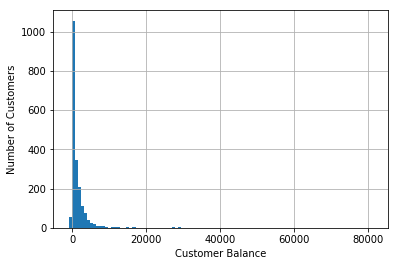

0      86
1       9
272     8
303     7
4       6
6       6
655     6
393     6
557     6
417     6
Name: balance, dtype: int64

In [12]:
# Let's start by plotting a histogram of Applicant Balance

df['balance'].hist(bins=100)
plt.xlabel('Customer Balance')
plt.ylabel('Number of Customers')
plt.show()

df.balance.value_counts(sort=True, ascending=False).head(10)

#### In the histogram above, 
- Most of the customers have a balance in the range of 0 to 10000. 
- 86 customers have 0 balance in the bank
- We can also observe that there are `few extreme values` of balance.

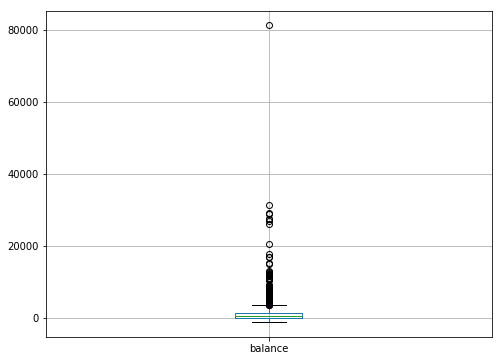

In [13]:
# Lets look at boxplots to understand the distribution better for the attribute "balance"

df.boxplot(column='balance', figsize=(8,6))

#### The boxplot above confirms the presence of a lot of outliers/extreme values. This may be attributed to the income disparity in the society. 
#### Part of this can be due to the fact that we are looking at people with different `age` groups,  `educational` and `job` background.

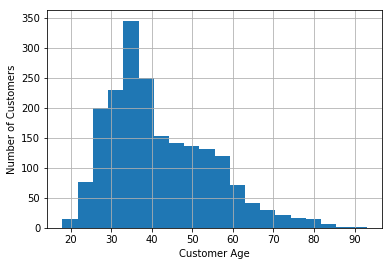

In [14]:
# Let's start by plotting a histogram of Applicant AGE using the command:

df['age'].hist(bins=20)
plt.xlabel('Customer Age')
plt.ylabel('Number of Customers')
plt.show()

#### From the Histogram plot, 
- We can see that most of the customers are in the age group 25-60 years 
- This hints thats the working class age group was targeted by the bank
- The peak age group (almost 350 customers) is of age 35 years.

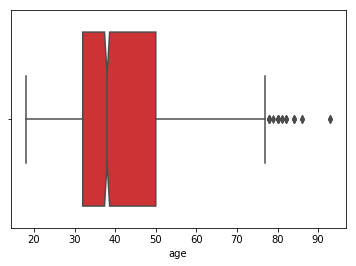

In [15]:
# Next, we look at boxplots to understand the distribution better.

sns.boxplot(x='age', data=df, notch=True, palette='Set1')
plt.show()

#### The attribute `age` have some possible outliers in the range 75-90 years. There is only one person who is older than 90 years old.

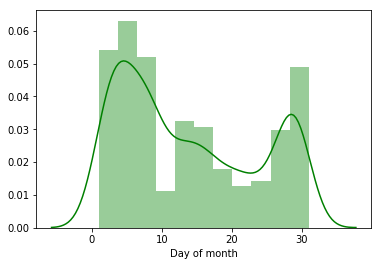

In [16]:
# Lets see the distribution of the numeric variable "DAY" 

sns.distplot(df['day'], color='g')
plt.xlabel('Day of month')
plt.show()

#### Observation on day:
- We can see that the there are 2 peaks in the distribution plot of attribute "day".  
- This suggests that customers were contacted _mostly_ at the ``beginning and very end of the month``, as it might be the near the pay/salary day which might result in a positive subscription  

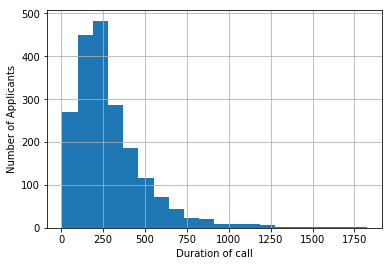

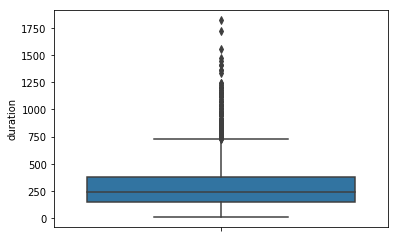

In [17]:
# Lets see the distribution of the numeric variable "Duration"

df['duration'].hist(bins=20)
plt.xlabel('Duration of call')
plt.ylabel('Number of Applicants')
plt.show()

# Box plot for Duration

sns.boxplot(x='duration', data=df, orient='v')
plt.show()

#### Observations on attribute duration: 
- We can see that the there is one peak in the distribution plot of attribute "duration" and its quite uniform.  
- Histogram on the attribute "duration" shows that the peak duration for which the customers(almost 1000) were in the call with bank was around 200 to 250 secs.
- Box plot show there is a presence of some extreme values and outliers in the attribute duration.
- There are few customers who were in the call will the bank for almost 1800 secs!

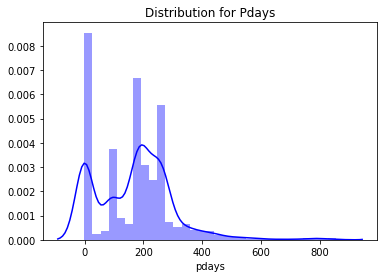

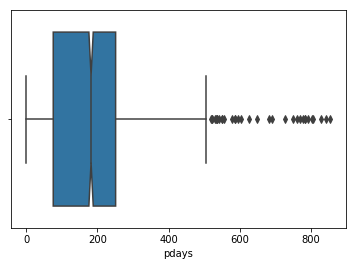

Description of pdays


count    2000.000000
mean      167.896000
std       131.754126
min        -1.000000
25%        75.750000
50%       182.000000
75%       251.000000
max       854.000000
Name: pdays, dtype: float64

In [18]:
# Lets see the distribution of the numeric variable "pdays"

sns.distplot(df['pdays'], color='b')
plt.title('Distribution for Pdays')
plt.show()

# Box plot for the numeric variable "pdays" 
sns.boxplot(x='pdays', data=df, notch=True)
plt.show()

print("Description of pdays")
df.pdays.describe()

#### Observation on attribute "pdays"
- The minimum value of pdays is -1, that might mean that many customers have never been previously contacted by the bank.
- There are some extreme outliers in the "pdays" attribute. The max value is 854 which means the bank contacted a few customer 854 days, which is highly unlikely and is a clearly an outlier.

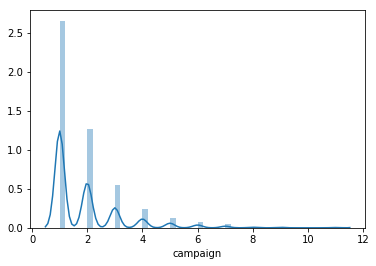

1     1063
2      506
3      219
4       99
5       50
6       31
7       17
8        6
9        5
10       1
11       3
Name: campaign, dtype: int64

In [19]:
# Lets see the distribution of the numeric variable "Campaign"

sns.distplot(df.campaign)
plt.show()
df.campaign.value_counts(sort=False)

#### Observation on attribute Campaign:
- Most of the customers were only contacted once or twice by the bank during the campaign
- 1063 customers (almost 50%) were contacted only once during the campaign
- Only 4 customers were contacted 10 to 11 times.

C:\Users\abhijits\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


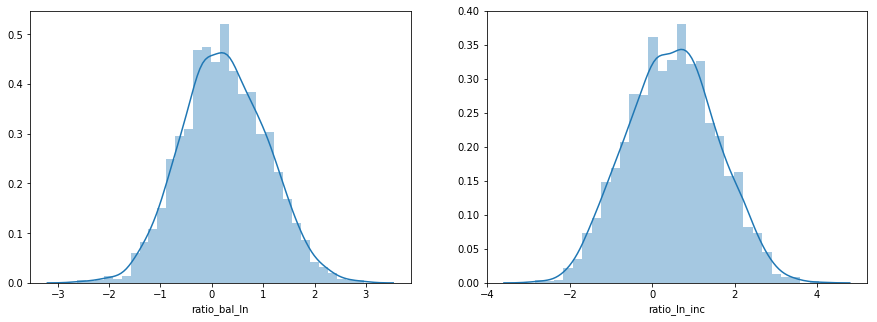

In [20]:
# Lets see the distribution of the numeric variable "ratio_bal_ln" and "ratio_ln_inc" 

fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(1,2,1)
sns.distplot(df.ratio_bal_ln)

ax = fig.add_subplot(1,2,2)
sns.distplot(df.ratio_ln_inc)
fig.show()

#### Observations on attributes "ratio_bal_ln" and "ratio_ln_inc" :
- The attributes "ratio_bal_ln" and "ratio_ln_inc" has a uniform histogram distribution

### Distribution Analysis for Categorical Attributes

Frequency Table for marital status:
divorced     215
single       674
married     1111
Name: marital, dtype: int64


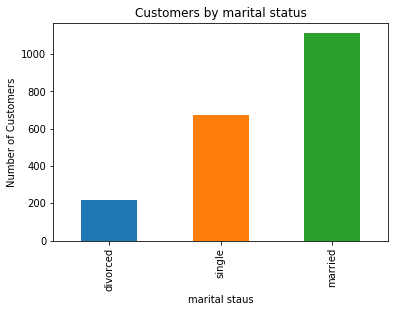

In [21]:
# Frequncy table of Marital status
frequency_table_marital = df['marital'].value_counts(ascending=True)
print('Frequency Table for marital status:') 
print(frequency_table_marital)

# Plot the frequency table for marital status
frequency_table_marital.plot(kind='bar')
plt.xlabel('marital staus')
plt.ylabel('Number of Customers')
plt.title('Customers by marital status')
plt.show()

More customers are married and the least are divorced.

          subscribed
marital             
divorced    0.437209
married     0.450945
single      0.600890


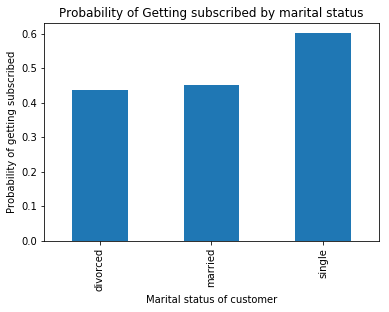

In [22]:
pivot_table_marital = df.pivot_table(values='subscribed',
                       index=['marital'],
                       aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())
print(pivot_table_marital)

# Let's plot marital status and the probability of getting subscribed based on marital status.
pivot_table_marital.plot(kind='bar')
plt.xlabel('Marital status of customer')
plt.ylabel('Probability of getting subscribed')
plt.title('Probability of Getting subscribed by marital status')
plt.legend().set_visible(False) # we don't need the default legend
plt.show()

#### The probability of getting the customer subscribed by bank is 60% for customer who are single. 45% married and 43% divorced customers also subscribed to the bank 

Frequency Table for education:
primary      217
tertiary     684
secondary    995
Name: education, dtype: int64


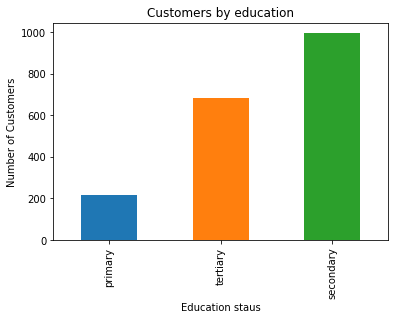

In [23]:
# Frequncy table of education
frequency_table_education = df['education'].value_counts(ascending=True)
print('Frequency Table for education:') 
print(frequency_table_education)

# Plot the frequency table for education 
frequency_table_education.plot(kind='bar')
plt.xlabel('Education staus')
plt.ylabel('Number of Customers')
plt.title('Customers by education')
plt.show()

Most customers have completed secondary education and the least have done primary education

           subscribed
education            
primary      0.387097
secondary    0.453266
tertiary     0.578947


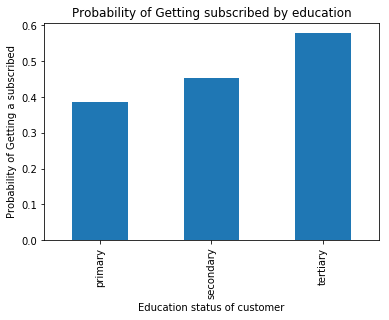

In [24]:
pivot_table_education = df.pivot_table(values='subscribed',
                       index=['education'],
                       aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())
print(pivot_table_education)

# Let's plot education status and the probability of getting subscribed based on marital status.
pivot_table_education.plot(kind='bar')
plt.xlabel('Education status of customer')
plt.ylabel('Probability of Getting a subscribed')
plt.title('Probability of Getting subscribed by education')
plt.legend().set_visible(False) # we don't need the default legend
plt.show()

#### The probability of getting the customer subscribed by bank is 57.8% for customer who have teritary education. 45% secondary and 38.7% primary educated customers also subscribed to the bank 

### Generate two plots with the combined distribution of attributes and draw conclusions from them (in a markdown cell).

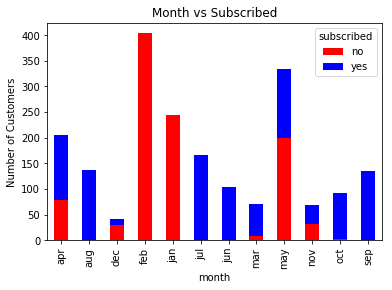

In [25]:
stacked_chart = pd.crosstab(df['month'], df['subscribed'])
stacked_chart.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.title("Month vs Subscribed")
plt.ylabel('Number of Customers')
plt.show()

#### Customers who were contacted on the month Jan and Feb did not subscribed. However, during the months June, July, August, Sept. and October, the subscription has been a success.

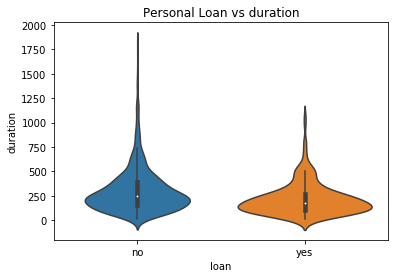

In [26]:
# Violin plot for Loan vs duration

sns.violinplot(x='loan', y='duration', data=df)
plt.title("Personal Loan vs duration")
plt.show()

#### Customers who have a personal loan spent less time on the call with the bank

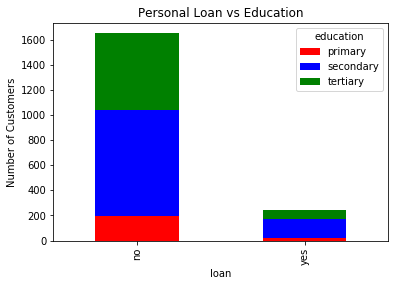

In [27]:
# Personal Loan vs Education
stacked_chart = pd.crosstab(df['loan'], df['education'])
stacked_chart.plot(kind='bar', stacked=True, color=['red', 'blue', 'green'])
plt.title("Personal Loan vs Education")
plt.ylabel('Number of Customers')
plt.show()

#### Secondary educated customers have more personal loan than primary and tertiary educated customers

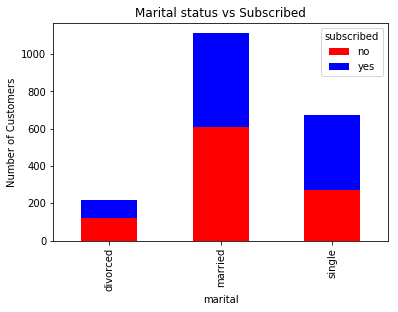

In [28]:
# Marital vs Subscibed
stacked_chart = pd.crosstab(df['marital'], df['subscribed'])
stacked_chart.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.title("Marital status vs Subscribed")
plt.ylabel('Number of Customers')
plt.show()

#### Married and Single customers have more subscriptions

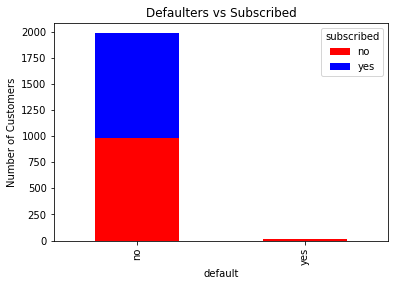

In [29]:
# Default vs subscribed
stacked_chart_default = pd.crosstab(df['default'], df['subscribed'])
stacked_chart_default.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.title("Defaulters vs Subscribed")
plt.ylabel('Number of Customers')
plt.show()

#### Customers who are defaulters almost didn't subscribed to bank

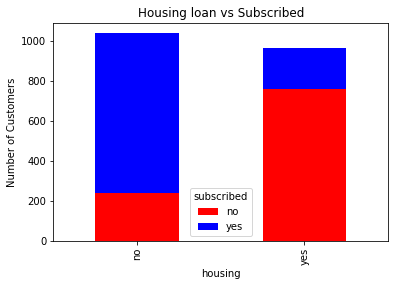

In [30]:
# Housing loan vs subscribed
stacked_chart = pd.crosstab(df['housing'], df['subscribed'])
stacked_chart.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.title("Housing loan vs Subscribed")
plt.ylabel('Number of Customers')
plt.show()

#### Customers who have Housing loan have less changes of being subscribed

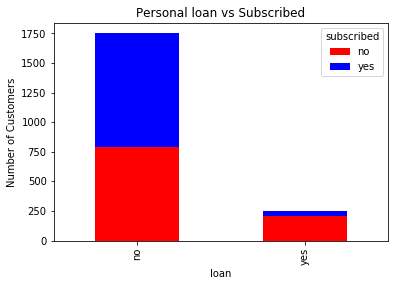

In [31]:
# Bar plot of Personal loan vs subscribed
stacked_chart = pd.crosstab(df['loan'], df['subscribed'])
stacked_chart.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.title("Personal loan vs Subscribed")
plt.ylabel('Number of Customers')
plt.show()

#### Customers who have personal loan have less changes of being subscribed

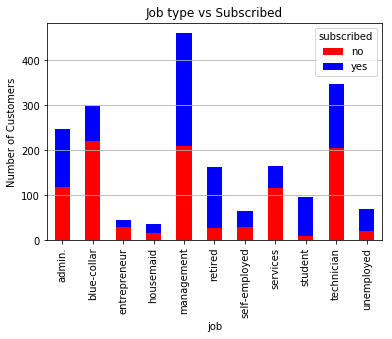

subscribed,no,yes,All
job,,,
admin.,117,130,247
blue-collar,221,77,298
entrepreneur,30,15,45
housemaid,15,20,35
management,210,251,461
retired,26,136,162
self-employed,29,35,64
services,115,50,165
student,9,87,96


In [32]:
# Job type vs subscribed
stacked_chart = pd.crosstab(df['job'], df['subscribed'])
stacked_chart.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.title("Job type vs Subscribed")
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

# Since there are a lot of categories in "job" lets see the values
pd.crosstab(df.job, df.subscribed,margins=True).style.background_gradient(cmap='summer_r')

#### Customers with job type: blue-collar, services and technicians have less chances of getting subscribed.

### Generate additional plots to identify two numerical attributes that can potentially be used for predicting the value of the dependent variable you chose in Task 1.

#### Lets look at the numeric attributes for the list (age, balance, ratio_bal_ln, ratio_ln_inc, day, duration, campaign, pdays, previous) and try to find the 2 best attributes which can potentially be used for prediction of the output variable ''subscribed".
- The numerical attributes should be linearly separable for the the PLA algorithm for convergence.
- Looking at the data so far, there doesn't seem to be any 2 obvious numerical attributes which are perfectly linearly separable.
- Goal is to find the best 2 numeric attributes for the prediction

In [33]:
# Create color blobs for the target attributes
cmap = lambda x: 'green' if x=='yes' else 'orange'
hue_subs =[]
for value in df['subscribed']:
    hue_subs.append(cmap(value))

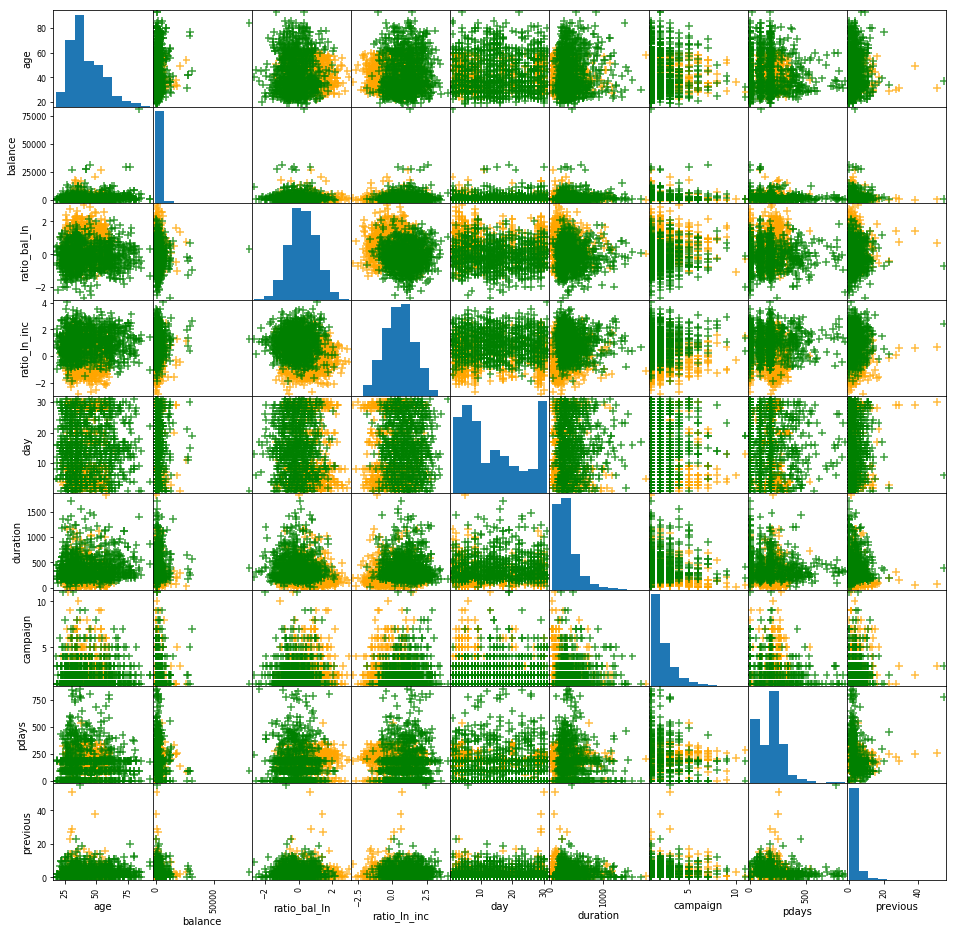

In [34]:
# The pairs plot builds on two basic figures, the histogram and the scatter plot. 
# The histogram on the diagonal allows us to see the distribution of a single variable while the 
# scatter plots on the upper and lower triangles show the relationship between two variables.

# Using pandas scatter matrix plot to build the pair plots
pair_plot = pd.plotting.scatter_matrix(df, c=hue_subs, figsize=(16, 16), marker='+',
                                       hist_kwds={'bins': 10}, s=60, alpha=.75)
plt.show()

#### Observations from the Pair Plot:
- TODO


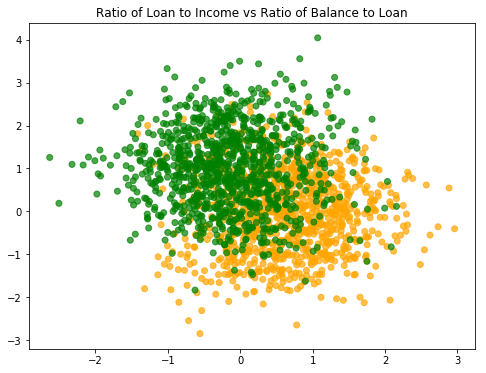

In [35]:
# Plot the scatter plot for "ratio_bal_ln" vs "ratio_ln_inc" to have a deeper look

plt.figure(figsize=(8,6))
plt.scatter(x=df.ratio_bal_ln, y=df.ratio_ln_inc, color=hue_subs, alpha=0.7)
plt.title('Ratio of Loan to Income vs Ratio of Balance to Loan')
plt.show()

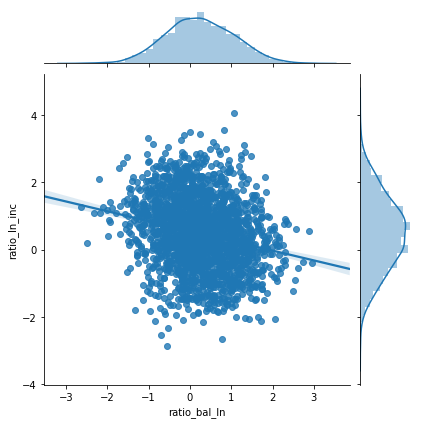

In [36]:
# Seaborn joint distribution plot between "ratio_bal_ln" vs "ratio_ln_inc" with regplot

sns.jointplot(x='ratio_bal_ln', y='ratio_ln_inc', data=df, kind='reg')
plt.show()

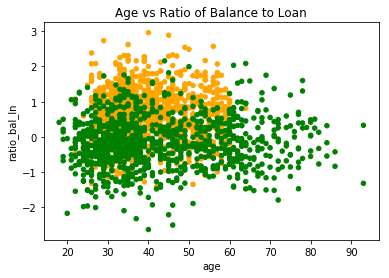

In [37]:
# Plot the scatter plot for "age" and "ratio_bal_ln"

df.plot.scatter(x='age', y='ratio_bal_ln', c=hue_subs)
plt.title('Age vs Ratio of Balance to Loan')
plt.show()

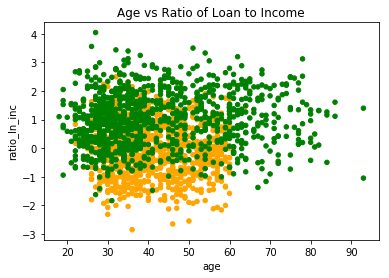

In [38]:
# Plot the scatter plot for "age" and "ratio_ln_inc"

df.plot.scatter(x='age', y='ratio_ln_inc', c=hue_subs)
plt.title('Age vs Ratio of Loan to Income')
plt.show()

#### From the above plots its clear that attributes "ratio_bal_ln" and "ratio_ln_inc" are the best candidates with numerical values for the 2 class classification of target variable "subscribed". The other two options are "Age" vs "ratio_bal_ln" and  "Age" vs "ratio_ln_inc".

- For this Etivity1, I am selecting "ratio_bal_ln" and "ratio_ln_inc" as the two numerical attributes for learning.

### Task 3
Consider the two numerical attributes picked in Task 2 and describe (in a markdown cell) how a perceptron can be used to perform 2-class classification. Use the following terms in your description:

- Input space
- Output space
- Unknown target function
- Data set
- Hypothesis set
- Final Hypothesis
- In-sample error
- Out-of-sample error

#### Task 3 Description:
The bank contacts various customers to get them subscribed to a new plan as per their campaign. So, they look at the historical client data from marketing campaign and from that we have extracted 2 numerical attributes ["ratio_bal_ln" and "ratio_ln_inc"] which corresponds to the 2 dimensional **Input Space X**. 

We want to predict if the customer will subscribe to the new plan or not based on the Y ["subscribed"] which is the **Output Space**. 

From the plot of "ratio_bal_ln" and "ratio_ln_inc" we have found that the attributes are not completely linearly separable but still is the best candidate to find a function approximating an **unknown target function** f: X->Y which links the input space to the output space on the bank **dataset**.

Perceptron learning algorithm and pocket algorithm is used to identify a **Hypothesis set** from which we extract the the **Final hypothesis** to find function "g" which approximates function "f". 

The main goal of the Perceptron is to learn the weights by applying transformation on the Input samples and is best suited to with data that is linearly separable is feature space. The perceptron learning algorithm updates the weight each time the target isn't met.

The **"In sample error [Ein]"** and **"Out sample error[Eout]"** is measured and compared if its within the Hoeffding inequality bound to determine whether learning is possible or not with the limited available dataset

### Task 4
Run the provided perceptron learning algorithm (PLA) on the dataset provided in the notebook. Take note of the number of iterations that were required to come to the final hypothesis and the final error. Once you are satisfied you understand these results, run the PLA algorithm on the dataset you have explored in the previous tasks (using the selected dependent variable and the two most promising numerical attributes/features). If results are unsatisfactory (if you don't get results at all, why would this be?), investigate how the PLA algorithm can be changed to improve the performance. Change the provided algorithm accordingly and plot estimates for P[Ein-Eout|>e]. Exercise 1.10 (see Python code below in the Resources section) gives an example of how you can create such plots. In the same plot add the Hoeffding Bound  and conclude whether or not the found results obey the Hoeffding Equation (in a markdown cell). Draw conclusions on whether or not you have found proof that learning is possible (in a markdown cell).

* HINT: The videos discuss the 'Pocket' algorithm as an improvement on the PLA.

Suggestion: try PLA on this dataset before using the bank dataset

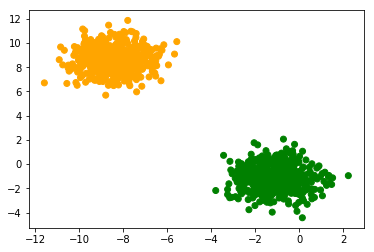

In [39]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2)
y = [yy if yy == 1 else -1 for yy in y]

hue = ['green' if yy == 1 else 'orange' for yy in y] 
plt.scatter(X[:,0], X[:,1], color=hue)
plt.show()

In [40]:
def h(x,w):
    #Perceptron model: the sign of the dot product of weights and input vector determines the class allocation
    bias = np.array([1])
    return np.sign(w.T.dot(np.concatenate((bias,x))))

In [41]:
def point_on_boundary(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2]

In [42]:
def decision_boundary(weights, x_min, x_max):
    # Return two points on the decision boundary
    return [point_on_boundary(weights, x_min), point_on_boundary(weights, x_max)]

In [43]:
def pla(training_in, training_out, weights):
    bias = np.array([1])
    iterations=0
    while True:
        errors = 0;
        for x,y in zip(training_in, training_out):
            if (h(x,weights)!=y):
                iterations+=1;
                weights = weights + y*(np.concatenate((bias,x)))
                print("X:{}, New_weights:{}, Bias:{}, Errors:{}".format(x, weights, bias, errors))
                errors+=1;
        if (errors == 0):
            print("Hypothesis found after iteration(s):", iterations)
            break
    return weights, iterations

In [44]:
def calc_error(training_in, training_out, weights):
    # Calculate the classification error as the fraction of training samples that are misclassified
    errors=0
    for x,y in zip(training_in, training_out):
        if (h(x,weights)!=y):
            errors+=1;
    return errors/len(training_in)

In [45]:
 def plot_boundary(w):
    # Display the boundary after applying PLA
    xs = [np.min(X[:,0]), np.max(X[:,0])]
    ys = decision_boundary(w, xs[0], xs[1])  
    plt.scatter(X[:,0], X[:,1], color=hue)
    plt.plot(xs, ys, 'r--')
    plt.show()

#### Running the PLA against the sample dataset

X:[-8.25504058  9.80732389], New_weights:[ 0.          9.25504058 -8.80732389], Bias:[1], Errors:0
X:[-1.51174122  0.15214412], New_weights:[ 1.          7.74329936 -8.65517977], Bias:[1], Errors:1
X:[-1.22112406 -0.0369405 ], New_weights:[ 2.          6.52217531 -8.69212027], Bias:[1], Errors:2
X:[-0.1814378   0.31709911], New_weights:[ 3.          6.3407375  -8.37502116], Bias:[1], Errors:3
X:[-1.88675258  1.58708441], New_weights:[ 4.          4.45398492 -6.78793675], Bias:[1], Errors:4
X:[-1.47347171  0.15230103], New_weights:[ 5.          2.98051321 -6.63563572], Bias:[1], Errors:5
X:[-1.69232771  0.00970059], New_weights:[ 6.          1.2881855  -6.62593513], Bias:[1], Errors:6
X:[-0.29802898  1.10261466], New_weights:[ 7.          0.99015651 -5.52332047], Bias:[1], Errors:7
X:[-0.71439357  2.06011035], New_weights:[ 8.          0.27576295 -3.46321012], Bias:[1], Errors:8
Hypothesis found after iteration(s): 9


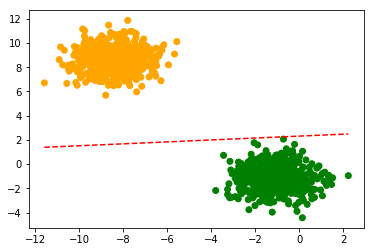

In [46]:
# Test PLA algorithm
weights = np.array([1,1,1])
new_weights, iterations = pla(X, y, weights)

# Plot the boundary
plot_boundary(new_weights)

####  Improving the PLA using Pocket algorithm

The aim of the Pocket Algorithm is to store the best weights which minimizes the error

1. Implemented the Pocket Algorithm which will stores the best weight and error.
2. Added a parameter "max_iter" to do early exit from PLA in case the error never becomes 0 (which is highly possible if the data is not linearly separable, like in this case)



In [47]:
def pla_with_pocket(training_in, training_out, weights, max_iter):
    bias = np.array([1])
    iterations=0

    # Initialize the variables
    best_weights = weights
    best_iteration = 0
    best_error = calc_error(training_in, training_out, weights)
    
    while iterations < max_iter:
        errors = 0;
        iterations+=1;
        print("Iteration:{}/{}".format(iterations, max_iter))
        
        for x,y in zip(training_in, training_out):           
            if (h(x,weights)!=y):
                
                # Store the best weights in the Pocket is error is less
                err = calc_error(training_in, training_out, weights)
                if err < best_error:
                    best_error = err
                    best_weights = weights
                    best_iteration = iterations
                    print("Weight pocketed {} with error {} @Iteration #{} ".format(
                        best_weights, best_error, best_iteration))
                
                weights = weights + y*(np.concatenate((bias,x)))
                errors+=1
                
        # Incase the data in linearly separable, there will be convergence with zero error
        if (errors == 0):
            print("Hypothesis found after iteration(s):", iterations)
            break
            
    return best_weights, best_iteration, best_error 

#### Preparing the data and setting weights, iterations for the Pocket algorithm
- Setting the max iterations
- Initializing the weights
- Converting the target variable from categorical value(yes/no) to numeric (+1/-1) 
- Shuffle the input sample and converting into to train and test data

In [48]:
# Number of iterations before exiting the PLA.
max_iterations = 10

# Intialize the weights 
#w = np.array([np.random.uniform(0, 1) for i in range(3)])
weights  = np.array([np.random.uniform(-1,1) for i in range(3)])
print(weights.view())

# Using 'ratio_bal_ln' and 'ratio_ln_inc' as the input data
X = df[['ratio_bal_ln', 'ratio_ln_inc']].values

# Using 'subscribed' as the output data
# The output data is converted from categorical data (yes/no) to numeric data (1/-1)
y = df['subscribed'].map(dict(yes=1, no=-1)).values

# Split the data in train and test set and Shuffle the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)                  
print(X_train.shape)
print(X_test.shape)

[ 0.93141886  0.89348944 -0.88840729]
(1600, 2)
(400, 2)


####  Find the In-sample error (Ein) by applying the Pocket Algorithm on the training data set

In [49]:
p_weight, p_iter, p_err = pla_with_pocket(X_train, y_train, weights, max_iterations)

print("*"*50)
print("Pocket algorithm found best weights :{} at Iteration {} with Error {}".format(p_weight, p_iter, p_err))
print("*"*50)

Iteration:1/10
Weight pocketed [-0.06858114  0.6093145  -1.62427688] with error 0.7175 @Iteration #1 
Weight pocketed [-1.06858114 -0.69579582 -0.46397813] with error 0.5075 @Iteration #1 
Weight pocketed [-0.06858114  0.90389522  1.14595006] with error 0.459375 @Iteration #1 
Weight pocketed [ 0.93141886 -0.06197857  1.44865837] with error 0.383125 @Iteration #1 
Weight pocketed [-0.06858114  0.27125042  1.83703143] with error 0.3575 @Iteration #1 
Weight pocketed [-1.06858114 -1.380714    1.21054563] with error 0.254375 @Iteration #1 
Weight pocketed [-0.06858114 -1.41168707  0.56309131] with error 0.239375 @Iteration #1 
Weight pocketed [-0.06858114 -1.28165023  1.5903361 ] with error 0.234375 @Iteration #1 
Weight pocketed [-1.06858114 -1.95886297  1.85707267] with error 0.23125 @Iteration #1 
Weight pocketed [-0.06858114 -2.10527443  1.97107209] with error 0.22875 @Iteration #1 
Weight pocketed [-0.06858114 -2.0900282   1.67353116] with error 0.22375 @Iteration #1 
Weight pocketed